In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy  as np

import pandasql
from pandasql import sqldf, load_meat, load_births
# pysqldf = lambda q: sqldf(q, globals())

meats   = load_meat()
births  = load_births()

In [23]:
meats.head()

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01,751.0,85.0,1280.0,89.0,NaN,NaN,NaN
1,1944-02-01,713.0,77.0,1169.0,72.0,NaN,NaN,NaN
2,1944-03-01,741.0,90.0,1128.0,75.0,NaN,NaN,NaN
3,1944-04-01,650.0,89.0,978.0,66.0,NaN,NaN,NaN
4,1944-05-01,681.0,106.0,1029.0,78.0,NaN,NaN,NaN


In [24]:
# выводим первые 10 строк 
# mySQL

sqldf("""
SELECT *
FROM
    meats
LIMIT 10
""")

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1944-01-01 00:00:00.000000,751.0,85.0,1280.0,89.0,None,None,None
1,1944-02-01 00:00:00.000000,713.0,77.0,1169.0,72.0,None,None,None
2,1944-03-01 00:00:00.000000,741.0,90.0,1128.0,75.0,None,None,None
3,1944-04-01 00:00:00.000000,650.0,89.0,978.0,66.0,None,None,None
4,1944-05-01 00:00:00.000000,681.0,106.0,1029.0,78.0,None,None,None
5,1944-06-01 00:00:00.000000,658.0,125.0,962.0,79.0,None,None,None
6,1944-07-01 00:00:00.000000,662.0,142.0,796.0,82.0,None,None,None
7,1944-08-01 00:00:00.000000,787.0,175.0,748.0,87.0,None,None,None
8,1944-09-01 00:00:00.000000,774.0,182.0,678.0,91.0,None,None,None
9,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,None,None,None


In [25]:
# выводим только нужные столбцы
sqldf("""
SELECT
    beef, pork
FROM
    meats
""")

,beef,pork
0,751.0,1280.0
1,713.0,1169.0
2,741.0,1128.0
3,650.0,978.0
4,681.0,1029.0
...,...,...
822,2200.8,1721.8
823,2367.5,1997.9
824,2016.0,1911.0
825,2343.7,2210.4


In [44]:
sqldf("""
SELECT * 
FROM meats
WHERE lamb_and_mutton > "60"
ORDER by lamb_and_mutton
""")

,date,beef,veal,pork,lamb_and_mutton,broilers,other_chicken,turkey
0,1954-03-01 00:00:00.000000,1068.0,121.0,770.0,61.0,NaN,None,NaN
1,1954-12-01 00:00:00.000000,1074.0,123.0,1012.0,61.0,NaN,None,NaN
2,1955-12-01 00:00:00.000000,1114.0,113.0,1145.0,61.0,NaN,None,NaN
3,1959-04-01 00:00:00.000000,1099.0,73.0,920.0,61.0,NaN,None,NaN
4,1960-03-01 00:00:00.000000,1201.0,83.0,981.0,61.0,283.6,None,13.4
...,...,...,...,...,...,...,...,...
120,1946-10-01 00:00:00.000000,840.0,167.0,662.0,96.0,NaN,None,NaN
121,1946-03-01 00:00:00.000000,796.0,92.0,780.0,97.0,NaN,None,NaN
122,1944-10-01 00:00:00.000000,834.0,215.0,777.0,100.0,NaN,None,NaN
123,1945-01-01 00:00:00.000000,820.0,119.0,1037.0,100.0,NaN,None,NaN


In [27]:
# суммируем всё содержимое столбца
sqldf("""
SELECT
    SUM(beef)
FROM
    meats
""")

,SUM(beef)
0,1392224.2


In [67]:
sqldf("""

            SELECT strftime('%Y',DATE(date))  AS year,
                   SUM(beef)                  AS beef,
                   SUM(veal)                  AS veal,
                   SUM(pork)                  AS pork
            FROM meats
            GROUP BY year
            ORDER BY year 
            ASC
            
        """)

,year,beef,veal,pork
0,1944,8801.0,1629.0,11502.0
1,1945,9936.0,1552.0,8843.0
2,1946,9010.0,1329.0,9220.0
3,1947,10096.0,1493.0,8811.0
4,1948,8766.0,1323.0,8486.0
...,...,...,...,...
64,2008,26561.2,143.1,23346.9
65,2009,25965.4,138.4,22999.0
66,2010,26304.3,134.2,22436.5
67,2011,26195.3,129.5,22758.2


In [57]:
#A query is defined to compute what amount of meat is consumed each year.
info = sqldf("""

            SELECT strftime('%Y',DATE(date))  AS year,
                   SUM(beef)                  AS beef,
                   SUM(veal)                  AS veal,
                   SUM(pork)                  AS pork
            FROM meats
            GROUP BY YEAR
            ORDER BY YEAR 
            ASC
            
        """)

info

,year,beef,veal,pork
0,1944,8801.0,1629.0,11502.0
1,1945,9936.0,1552.0,8843.0
2,1946,9010.0,1329.0,9220.0
3,1947,10096.0,1493.0,8811.0
4,1948,8766.0,1323.0,8486.0
...,...,...,...,...
64,2008,26561.2,143.1,23346.9
65,2009,25965.4,138.4,22999.0
66,2010,26304.3,134.2,22436.5
67,2011,26195.3,129.5,22758.2


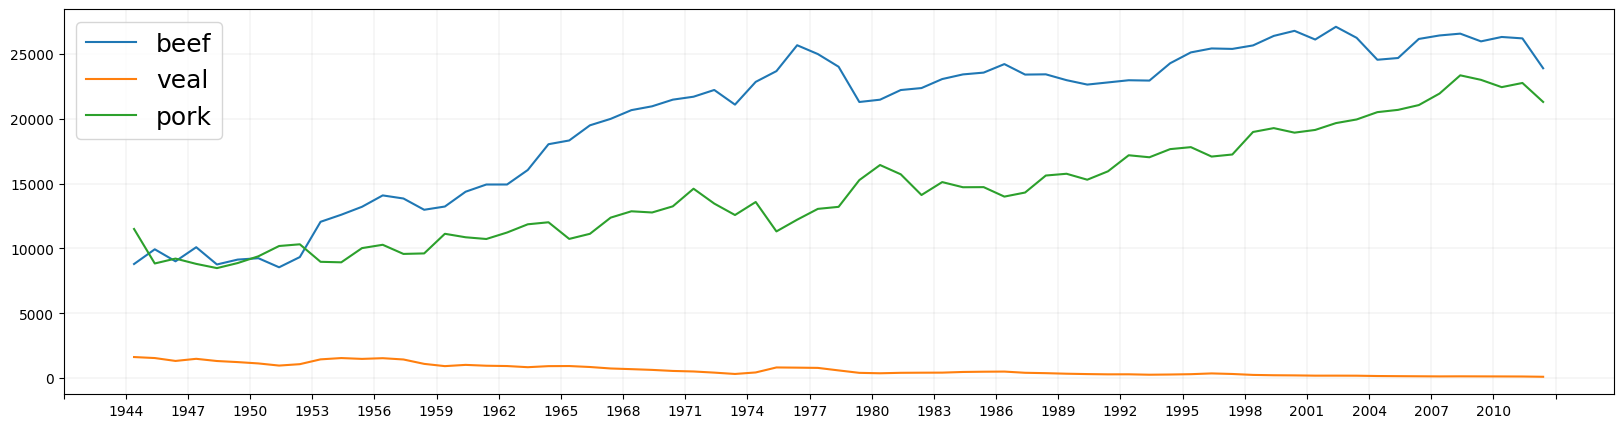

In [77]:
#We perform a quick plot to observe the behaviour of both meat consumption. 
fig, ax = plt.subplots(figsize=(20,5))

X = info['year'].values

plt.grid(linewidth='0.1', color='grey')
plt.plot(X, info['beef'].values, label='beef')
plt.plot(X, info['veal'].values, label='veal')
plt.plot(X, info['pork'].values, label='pork')
plt.legend(fontsize = 18)

start, end = ax.get_xlim()
ax.xaxis.set_ticks(np.arange(start, end, 3));

In [76]:
#We import pandasql
import pandasql
from pandasql import sqldf, load_meat, load_births


#We define our dataframes (samples from pandasql)
meats  = load_meat()
meats
births  = load_births()
births



#We perform the left join
meat_births_merged = sqldf("""

            WITH 
            MEAT_BY_YEAR AS   
                (
                SELECT strftime('%Y',DATE(date))  AS year,
                       SUM(beef)                  AS total_beef,
                       SUM(veal)                  AS total_veal
                FROM meats
                GROUP BY year
                ORDER BY year DESC
                ),
            
            BIRTHS_BY_YEAR AS 
                (
                SELECT strftime('%Y',DATE(date))  AS year,
                       SUM(births)          AS total_births
                FROM births
                GROUP BY YEAR
                ORDER BY YEAR DESC
                )
            
            SELECT 
                T1.year,
                T1.total_beef,
                T1.total_veal,
                T2.total_births
            
            FROM MEAT_BY_YEAR        AS T1
            LEFT JOIN BIRTHS_BY_YEAR AS T2
              ON T1.year = T2.year
            
        """)

meat_births_merged

,year,total_beef,total_veal,total_births
0,2012,23891.9,108.2,4130665.0
1,2011,26195.3,129.5,4247694.0
2,2010,26304.3,134.2,NaN
3,2009,25965.4,138.4,NaN
4,2008,26561.2,143.1,4265555.0
...,...,...,...,...
64,1948,8766.0,1323.0,NaN
65,1947,10096.0,1493.0,NaN
66,1946,9010.0,1329.0,NaN
67,1945,9936.0,1552.0,NaN


In [25]:
#We perform the case when clause to indicate which rows do not contain data, which years had a high birth rate
# and which ones did not.
pysqldf("""
            SELECT 
            *,
            
            CASE WHEN total_births IS NULL      THEN 'No Data'
                 WHEN total_births >= 4000000   THEN 'High Birth Rate'
                 WHEN total_births <  4000000   THEN 'Low Birth Rate'
            END AS birth_text
            
            
            FROM meat_births_merged
            
        """).head(15)

,year,total_beef,total_veal,total_births,birth_text
0,2012,23891.9,108.2,4130665.0,High Birth Rate
1,2011,26195.3,129.5,4247694.0,High Birth Rate
2,2010,26304.3,134.2,NaN,No Data
3,2009,25965.4,138.4,NaN,No Data
4,2008,26561.2,143.1,4265555.0,High Birth Rate
5,2007,26420.5,137.3,4138349.0,High Birth Rate
6,2006,26152.0,146.6,NaN,No Data
7,2005,24682.6,155.8,8210950.0,High Birth Rate
8,2004,24548.0,166.8,NaN,No Data
9,2003,26237.0,191.6,4021726.0,High Birth Rate


In [26]:
from sklearn import datasets
import pandas as pd

data = datasets.load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
